In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

from evoscape.landscapes import Landscape
from evoscape.modules import Node, UnstableNode, Center, NegCenter
from evoscape.landscape_visuals import *
from evoscape.morphogen_regimes import mr_const, mr_sigmoid, mr_piecewise

plt.style.use('default')
plt.rcParams.update({'figure.dpi': 100})
plt.rcParams.update({'font.size': 15})  

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Node: x=-1.5; y=0.0; a=1.5; s=1.
Node: x=1.5; y=0.0; a=2.; s=0.8
UnstableNode: x=0.0; y=1.0; a=1.3; s=0.8
Landscape with modules:
Node: x=-1.5; y=0.0; a=1.5; s=1.,
Node: x=1.5; y=0.0; a=2.; s=0.8,
UnstableNode: x=0.0; y=1.0; a=1.3; s=0.8


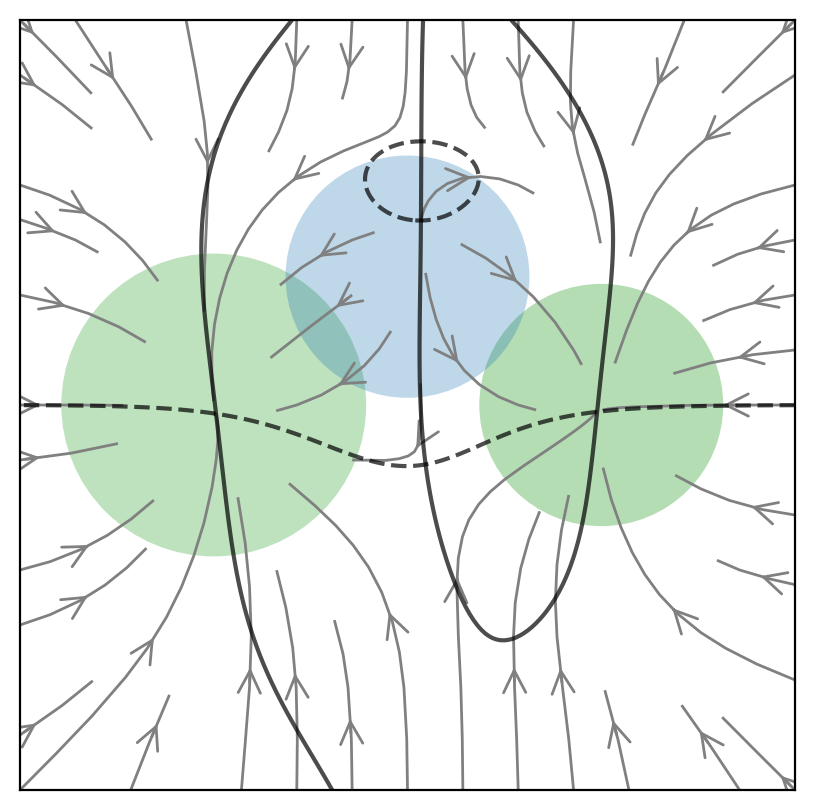

In [19]:
# Landscape with one regime + simple visualization
%autoreload
M1 = Node(x=-1.5, y=0., a=1.5, s=1.)
M2 = Node(x=1.5, y=0., a=2., s=0.8)
M3 = UnstableNode(x=0., y=1., a=1.3, s=0.8)

module_list = [M1, M2, M3]

for M in module_list:
    print(M)

l = Landscape(module_list, A0 = 0.05, regime=mr_const, n_regimes=1)
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape(l, xx, yy, regime=0, color_scheme='fp_types')


Node: x=-1.5; y=0.0; a=[1.5,2.0]; s=[1.0,0.6]
Node: x=1.5; y=0.0; a=[2.,2.]; s=[0.5,1.2]
UnstableNode: x=0.0; y=1.0; a=[1.3,1.4]; s=[0.8,0.5]
Landscape with modules:
Node: x=-1.5; y=0.0; a=[1.5,2.0]; s=[1.0,0.6],
Node: x=1.5; y=0.0; a=[2.,2.]; s=[0.5,1.2],
UnstableNode: x=0.0; y=1.0; a=[1.3,1.4]; s=[0.8,0.5]


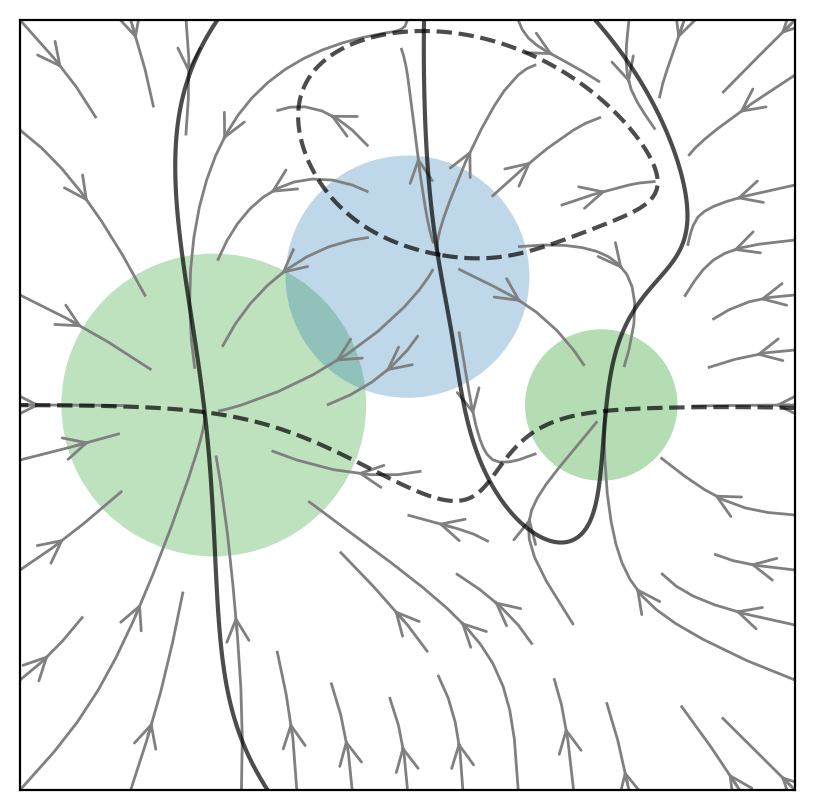

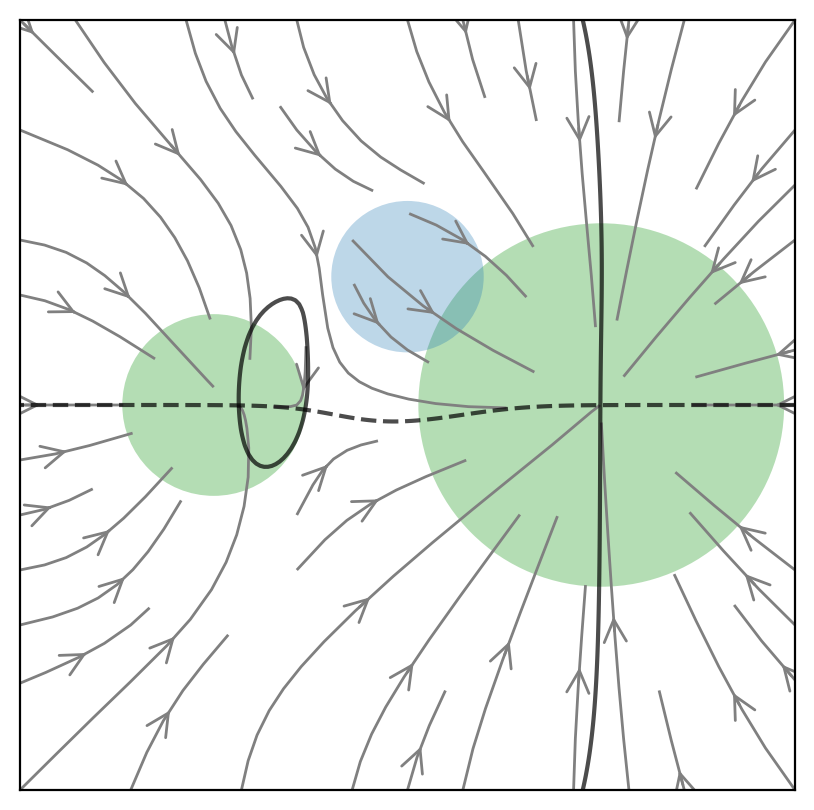

In [20]:
# Landscape with two regimes (piecewise) 

M1 = Node(x=-1.5, y=0., a=(1.5, 2.), s=(1., 0.6))
M2 = Node(x=1.5, y=0., a=(2., 2.), s=(0.5, 1.2))
M3 = UnstableNode(x=0., y=1., a=(1.3, 1.4), s=(0.8, 0.5))

module_list = [M1, M2, M3]

for M in module_list:
    print(M)

l = Landscape(module_list, A0 = 0.005, regime=mr_piecewise, n_regimes=2)
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape(l, xx, yy, regime=0, color_scheme='fp_types')
fig = visualize_landscape(l, xx, yy, regime=1, color_scheme='fp_types')


Landscape with modules:
Node: x=0.0; y=0.0; a=[1.5,1.5]; s=[2.,2.]; tau=1.0,
UnstableNode: x=0.0; y=0.0; a=[2.,0.]; s=[1.3,1.0]; tau=1.0,
Center: x=0.0; y=0.0; a=[1.,1.]; s=[2.2,2.2]; tau=1.0


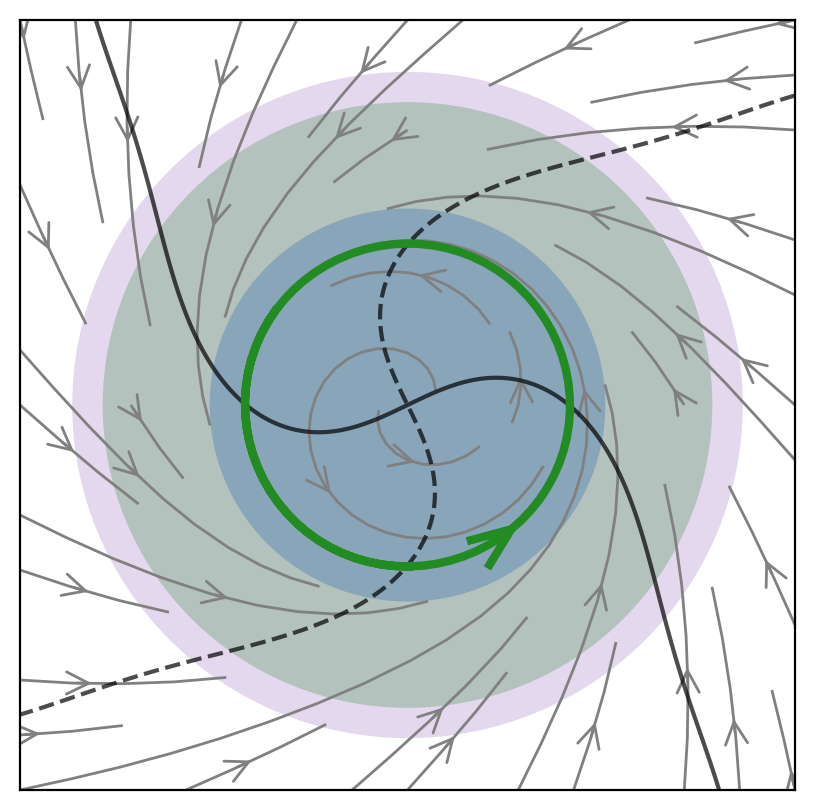

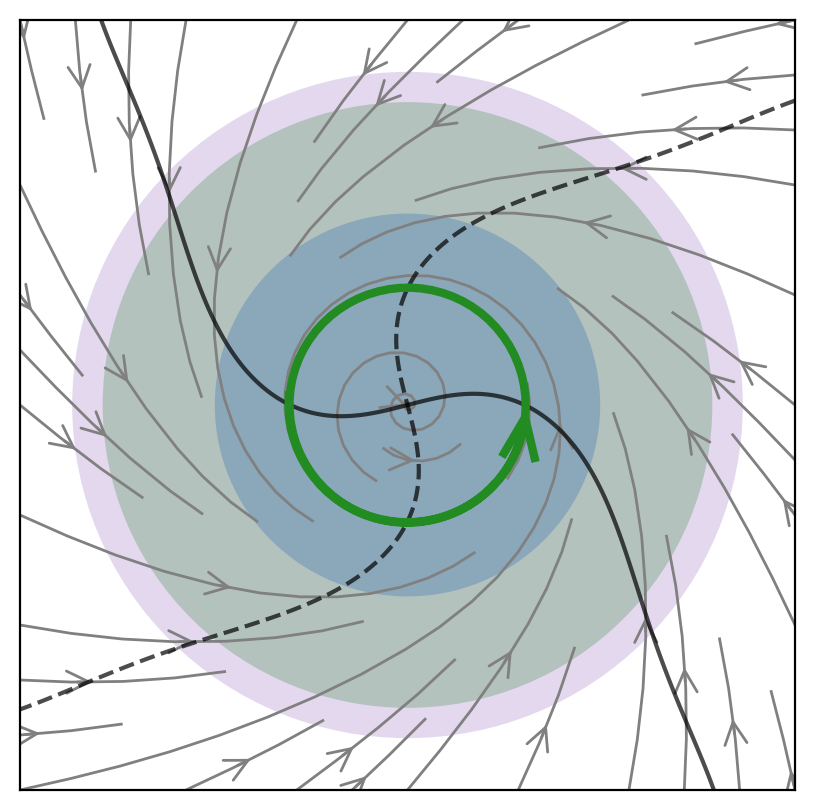

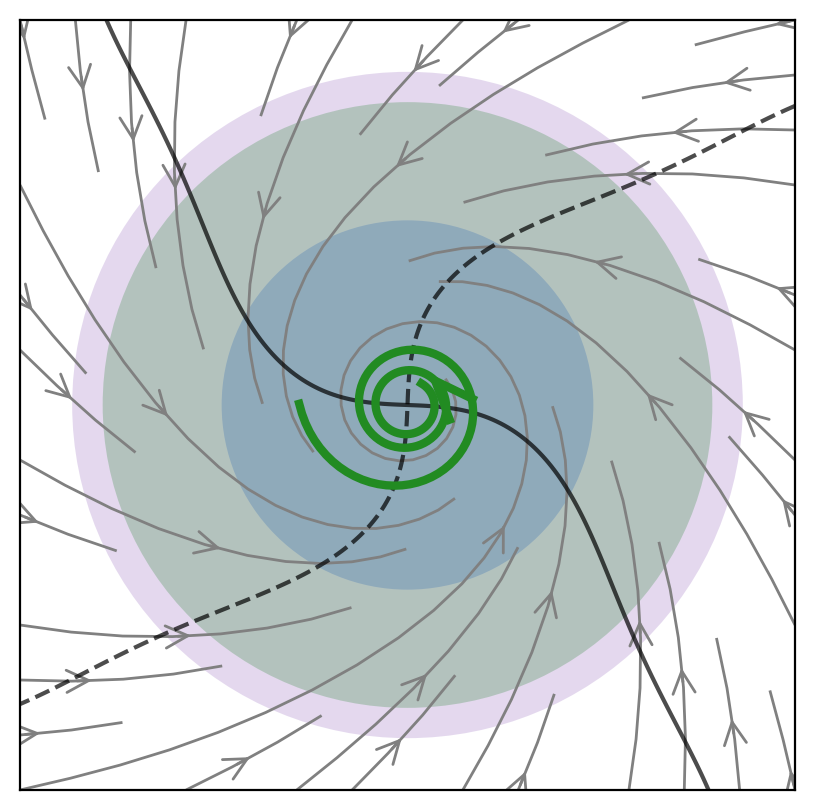

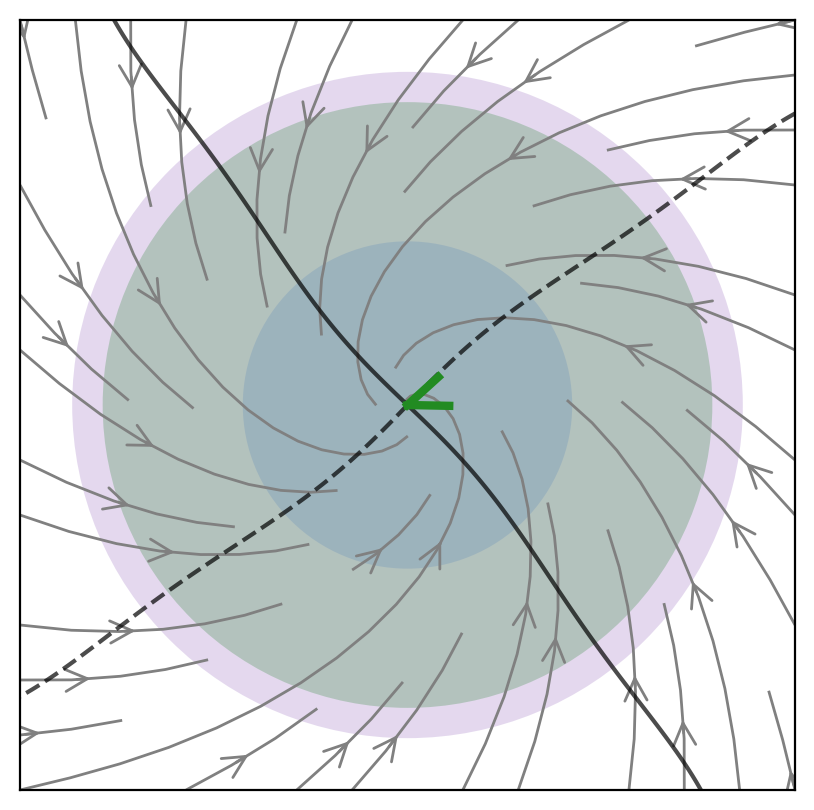

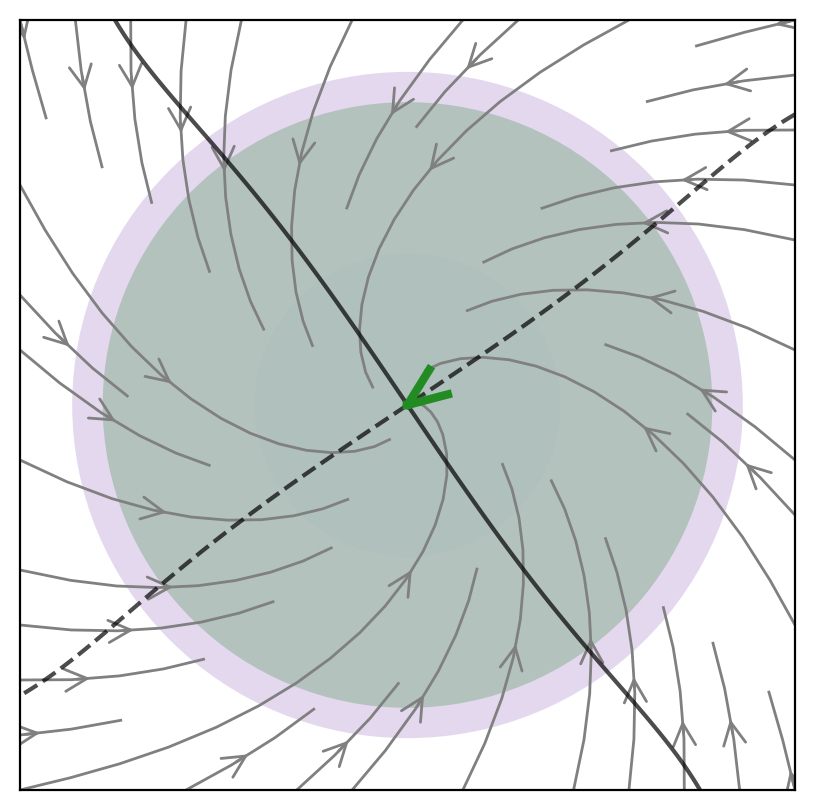

In [21]:
# Landscape with two regimes (sigmoid) + visulization of timepoints with trajectory 
# (Hopf bifurcation)

M1 = Node(0., 0., (1.5, 1.5), (2., 2.), tau=1.)
M2 = UnstableNode(0., 0., (2., 0), (1.3, 1.0), tau=1.)
M3 = Center(0., 0., (1., 1.), (2.2, 2.2), tau=1.)

module_list = [M1, M2, M3]

l = Landscape(module_list, A0 = 0.01, regime=mr_sigmoid, n_regimes=2, morphogen_times=(0.,))
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape_t(l, xx, yy, -5., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, -2., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, -1., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=30)
fig = visualize_landscape_t(l, xx, yy, 1., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, 5., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)



Landscape with modules:
Node: x=0.34395314614705175; y=-1.4112771647968207; a=[1.14726434,1.38374165,0.73083493]; s=[0.86798674,1.18936914,0.55297957],
Node: x=-1.021028272406277; y=0.8569579791992794; a=[1.24510486,0.70500379,1.28532967]; s=[1.03837867,0.93965426,0.93131951],
Node: x=1.847374851678481; y=-1.2037178726382893; a=[1.91616850,1.12914754,1.72025205]; s=[1.11634656,0.76429960,1.17472762],
Node: x=-1.6269212682020675; y=-0.4122550839316279; a=[0.71276795,1.92052946,0.93970529]; s=[0.50690543,0.89520046,0.76318640],
Node: x=0.7477289880659912; y=1.756521435601572; a=[1.30395731,0.98927740,1.14612957]; s=[0.77063847,0.63343969,0.55580253]


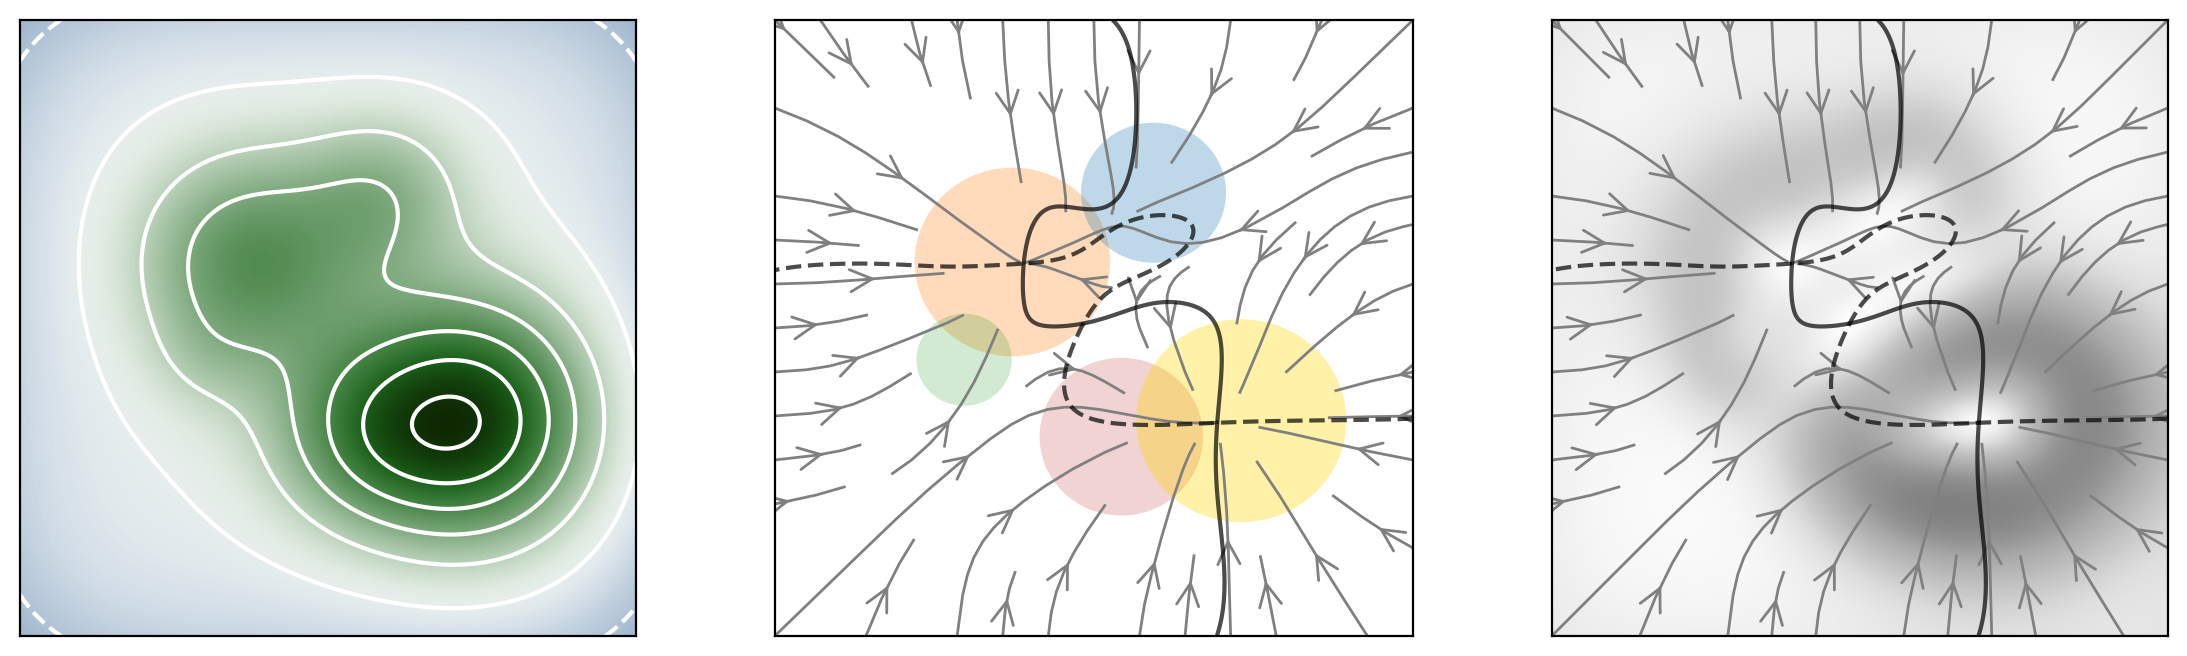

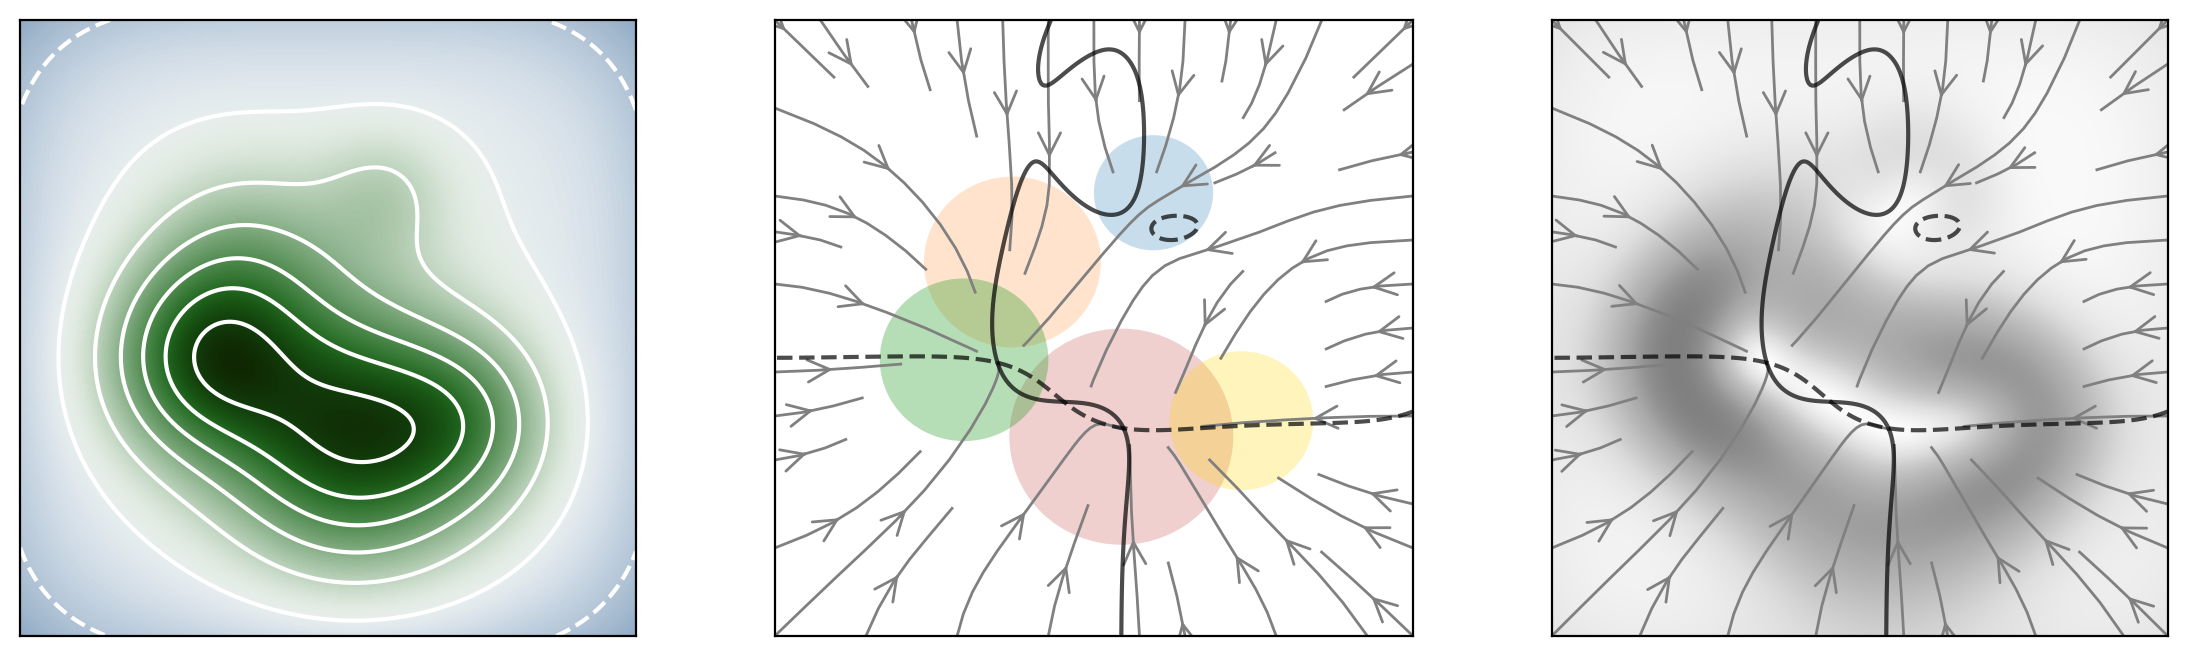

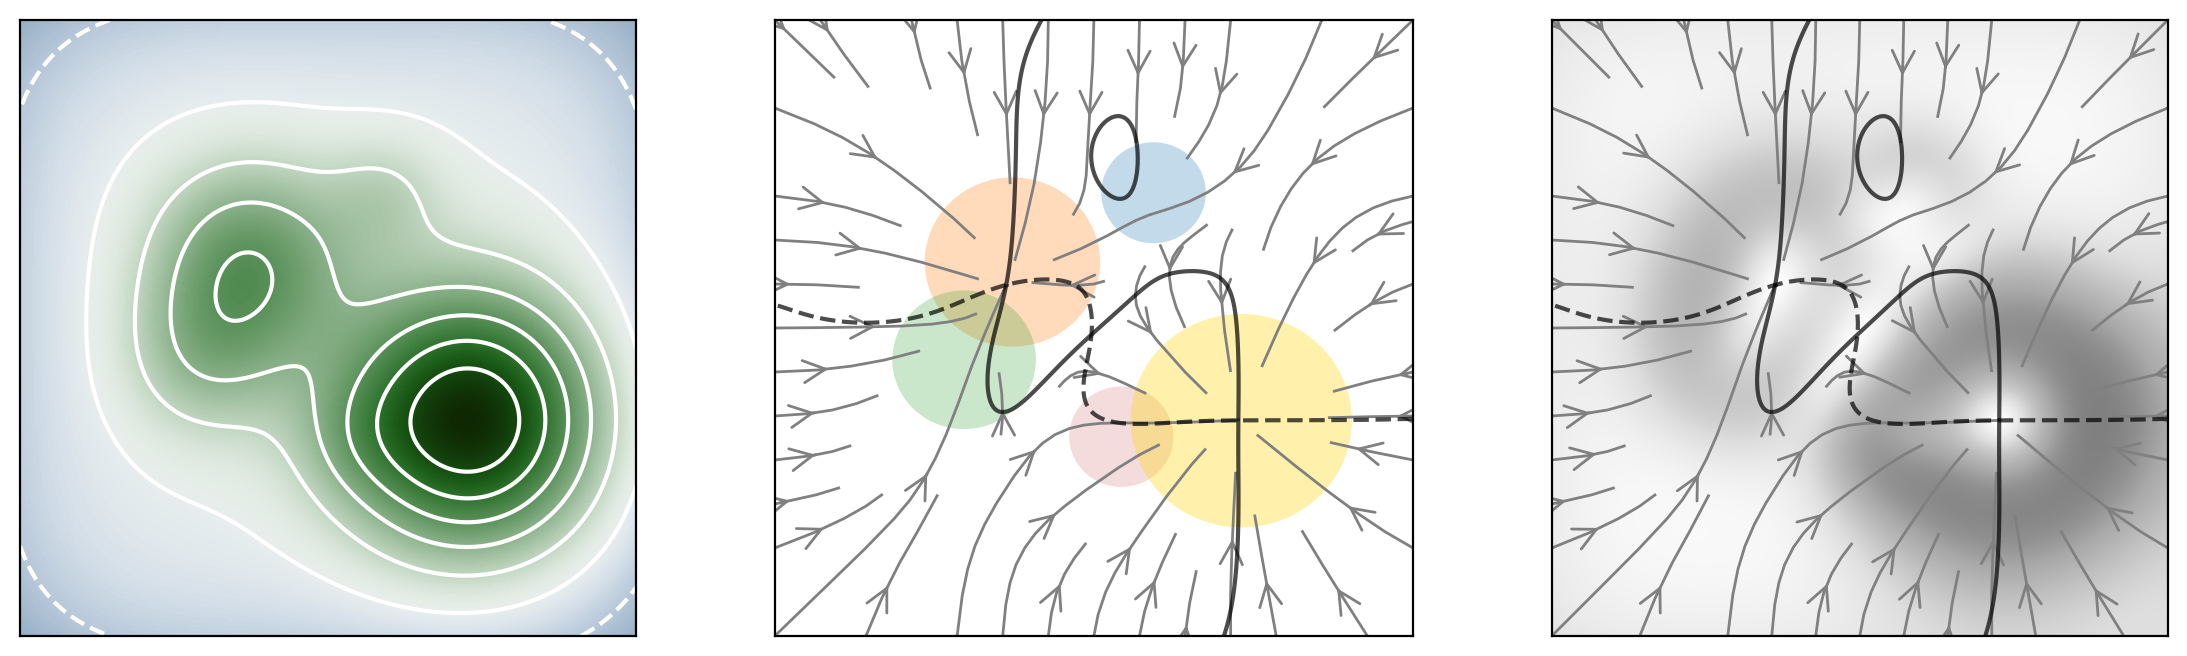

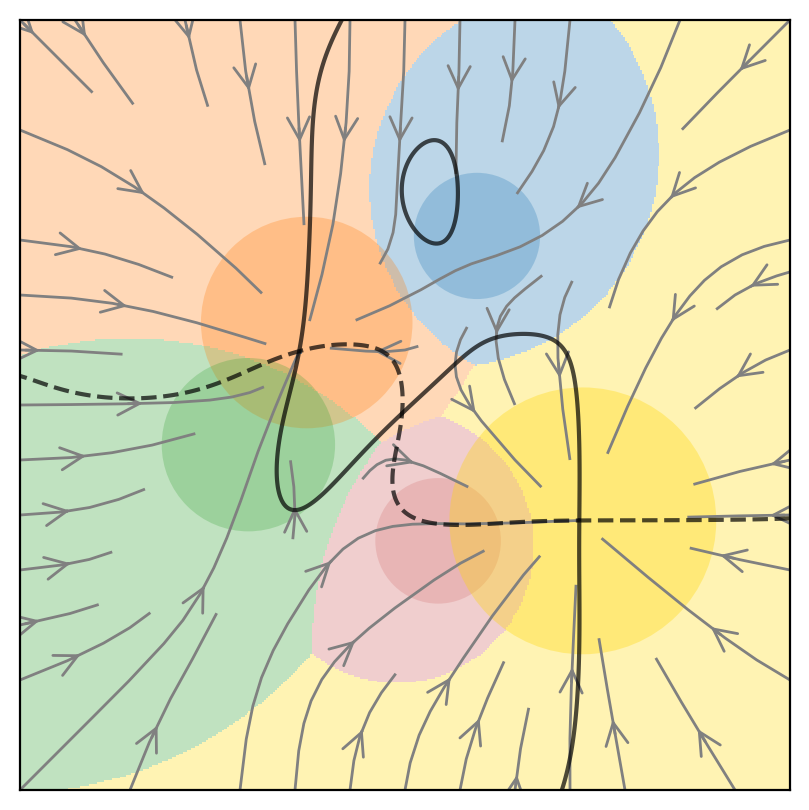

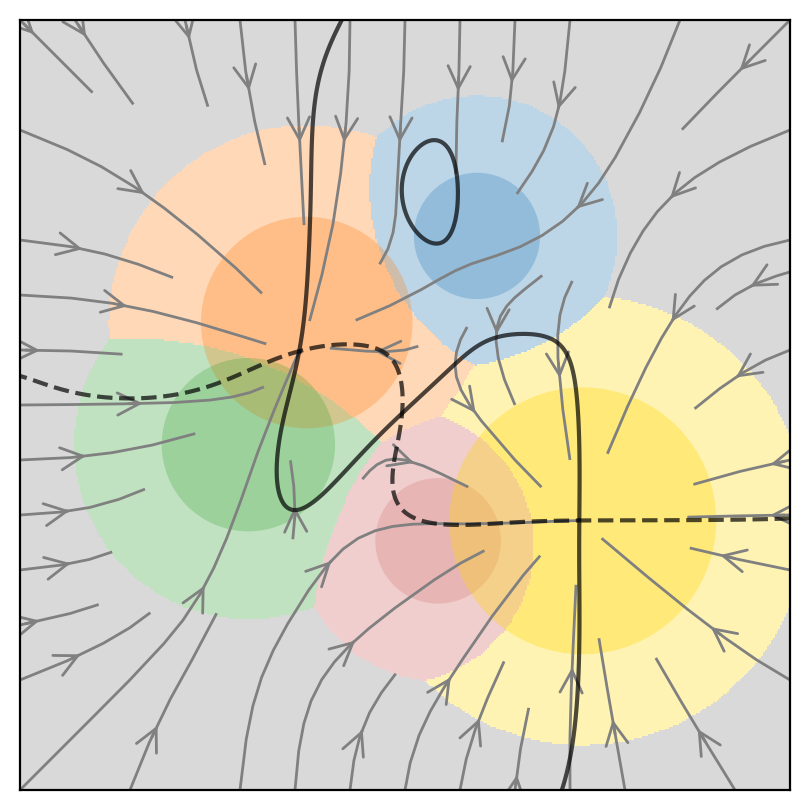

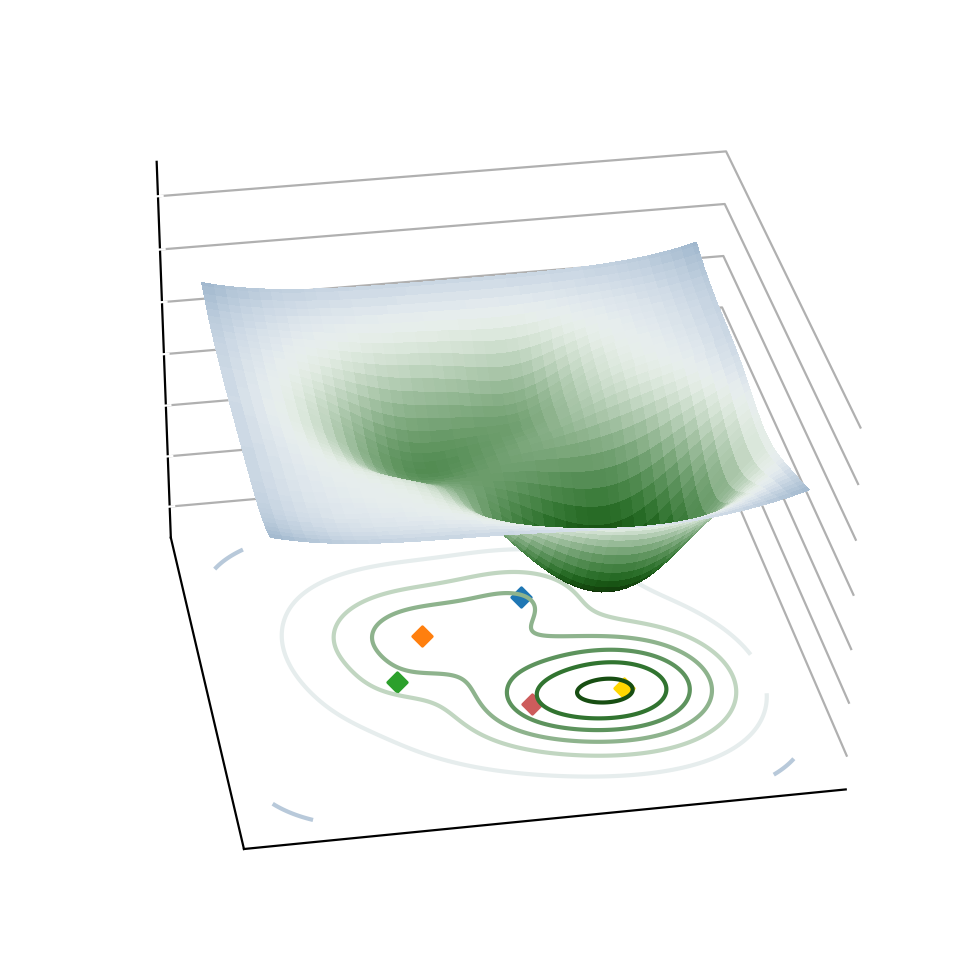

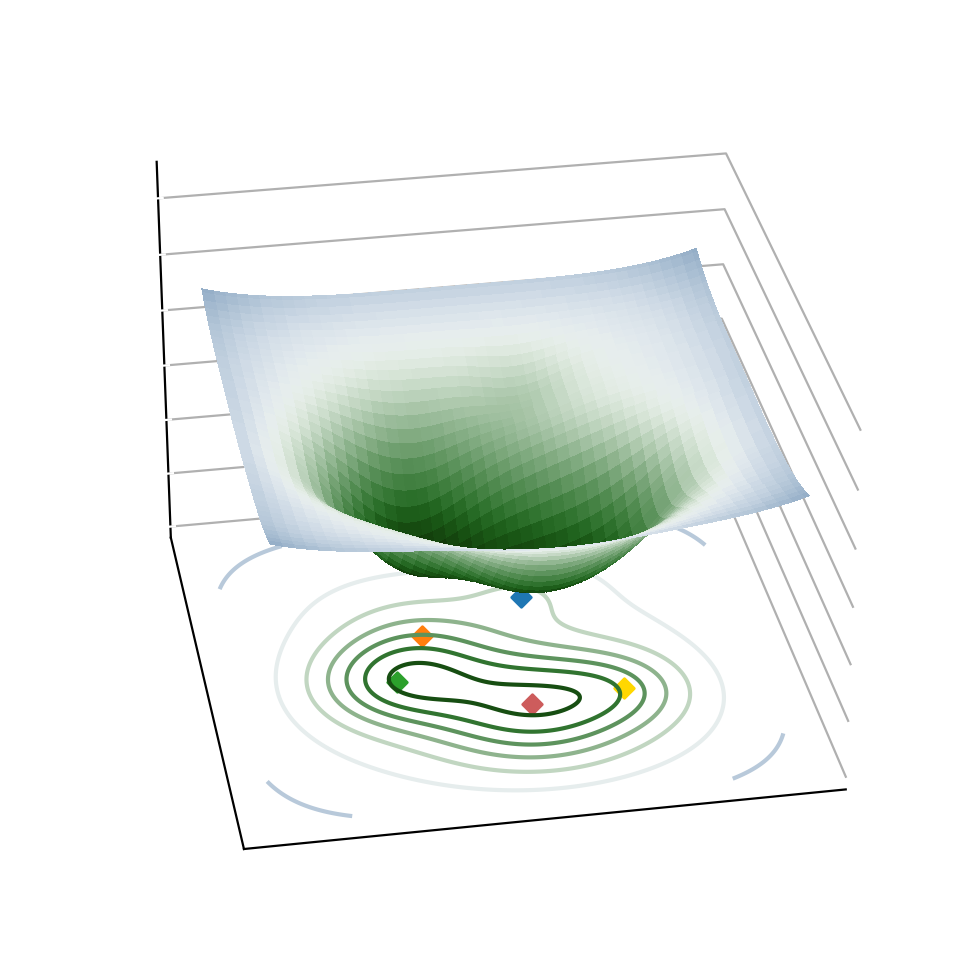

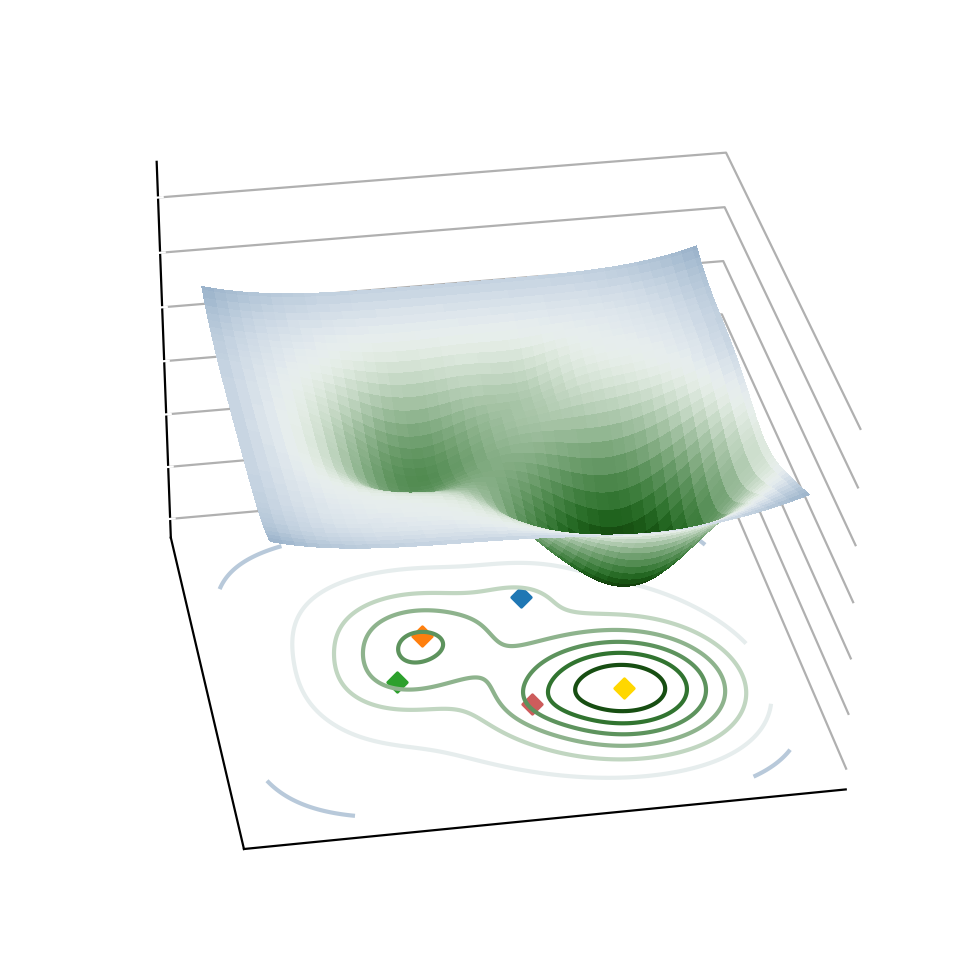

In [28]:
# Random generation of a landscape with node modules (piecewise 3 regimes)
%autoreload
par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5, 2.),
    's': (0.5, 1.2),
}

par_choice_values = {}

used_fp_types = (Node,)
n_modules = 5
start_module_list = [random.choice(used_fp_types).generate(par_limits,par_choice_values,
                                                           immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.005)
print(landscape)

L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
times = np.asarray((0., 3., 5.))   # timepoints at which to plot 

figures = visualize_all(landscape, xx,yy,times, color_scheme='order', plot_traj=False)

# cell_states = landscape.get_cell_states(6., np.array((xx.flatten(), yy.flatten())), abs_threshold=0.1)
# cmap_state = ListedColormap(['grey',]+list(order_colors))
# norm_state = BoundaryNorm(np.arange(len(order_colors) + 1) - 1.5, cmap_state.N)
# fig = visualize_landscape_t(landscape, xx, yy, 6., color_scheme='order')
# # plt.figure()
# plt.imshow(np.reshape(cell_states, (npoints, npoints)), cmap=cmap_state, norm=norm_state, origin='lower', extent=(-L, L, -L, L), alpha=0.3,
#            interpolation='nearest')
# plt.show()

fig = visualize_cell_states(landscape, xx, yy, 6., 0.)
fig = visualize_cell_states(landscape, xx, yy, 6., 0.1)

fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='order', cmap_center=0., scatter=True)
fig = visualize_potential(landscape, xx, yy, 1, azim=-100, color_scheme='order', cmap_center=0., scatter=True)
fig = visualize_potential(landscape, xx, yy, 2, azim=-100, color_scheme='order', cmap_center=0., scatter=True)


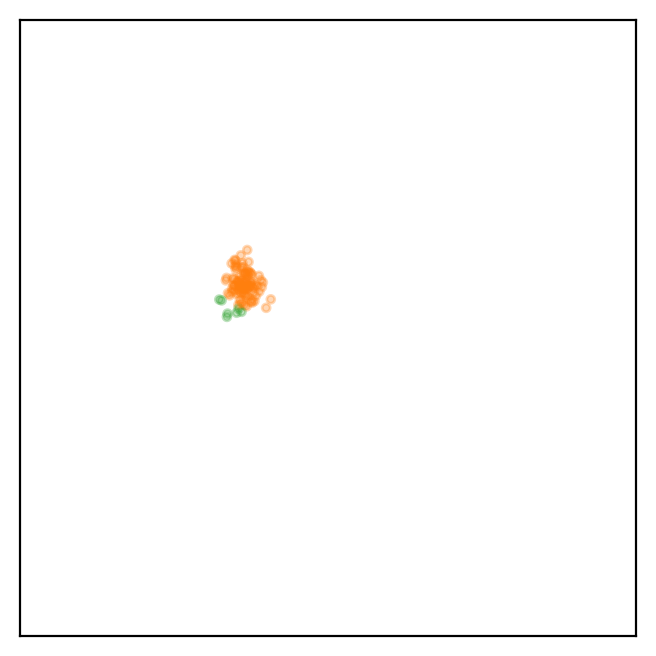

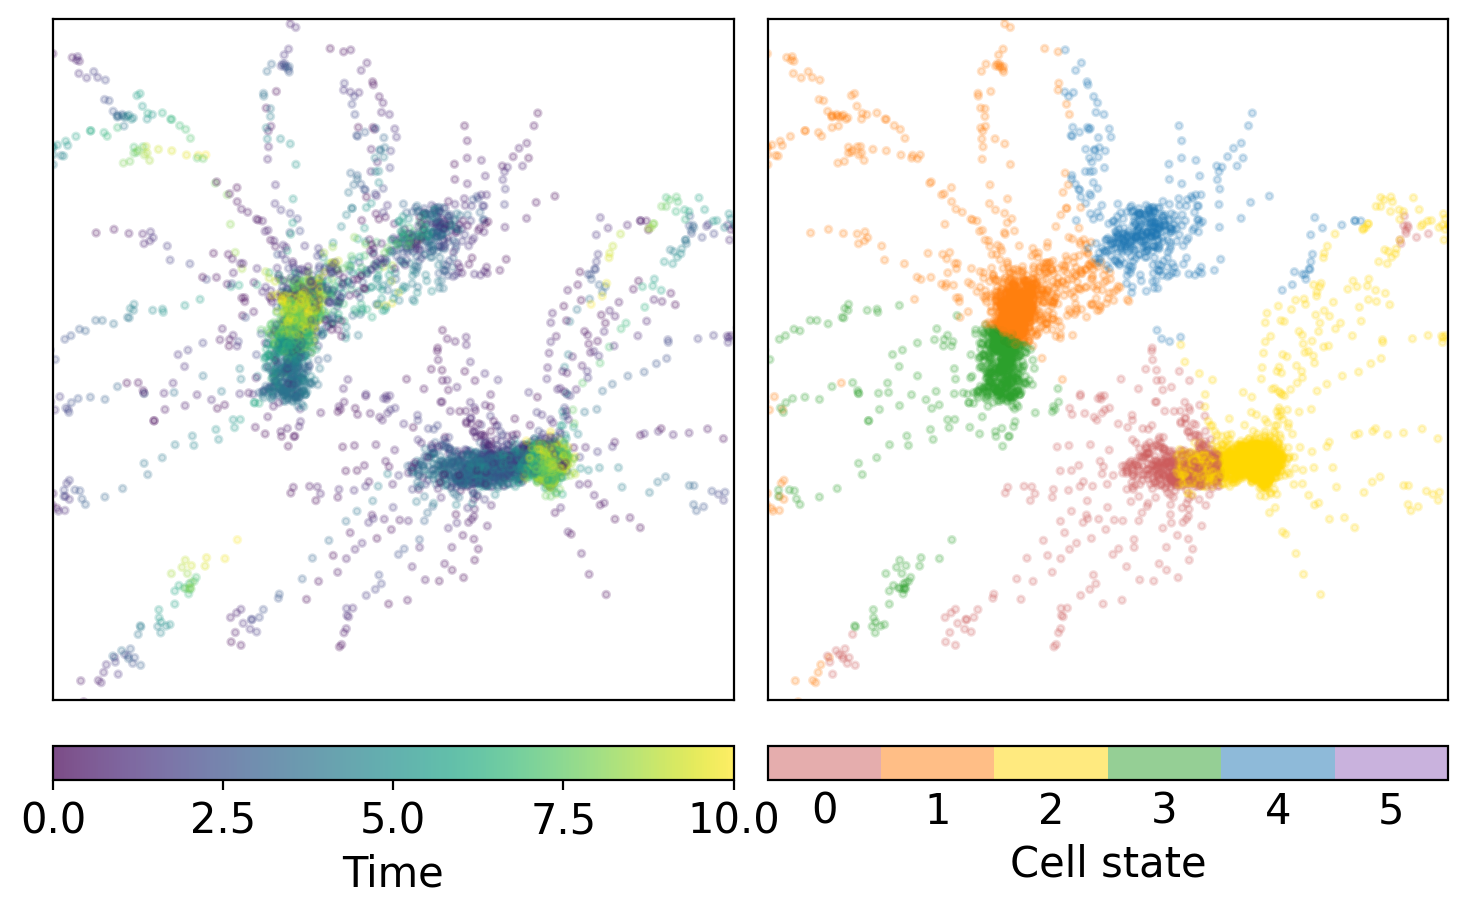

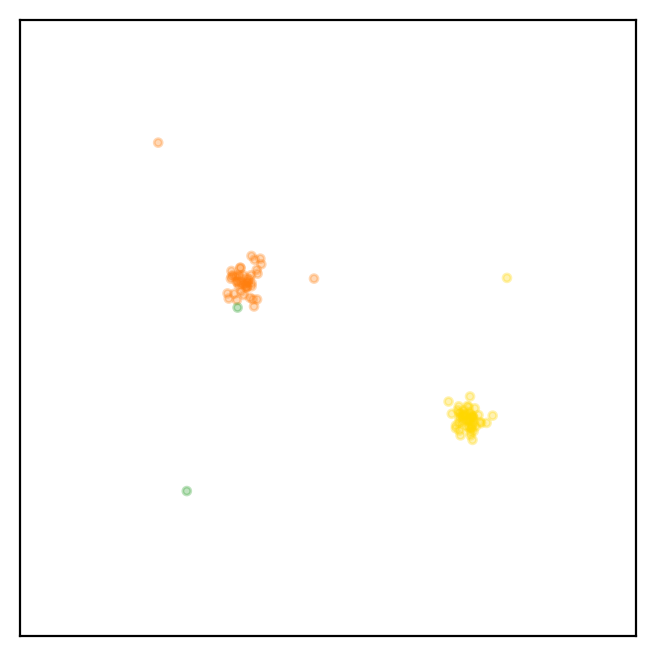

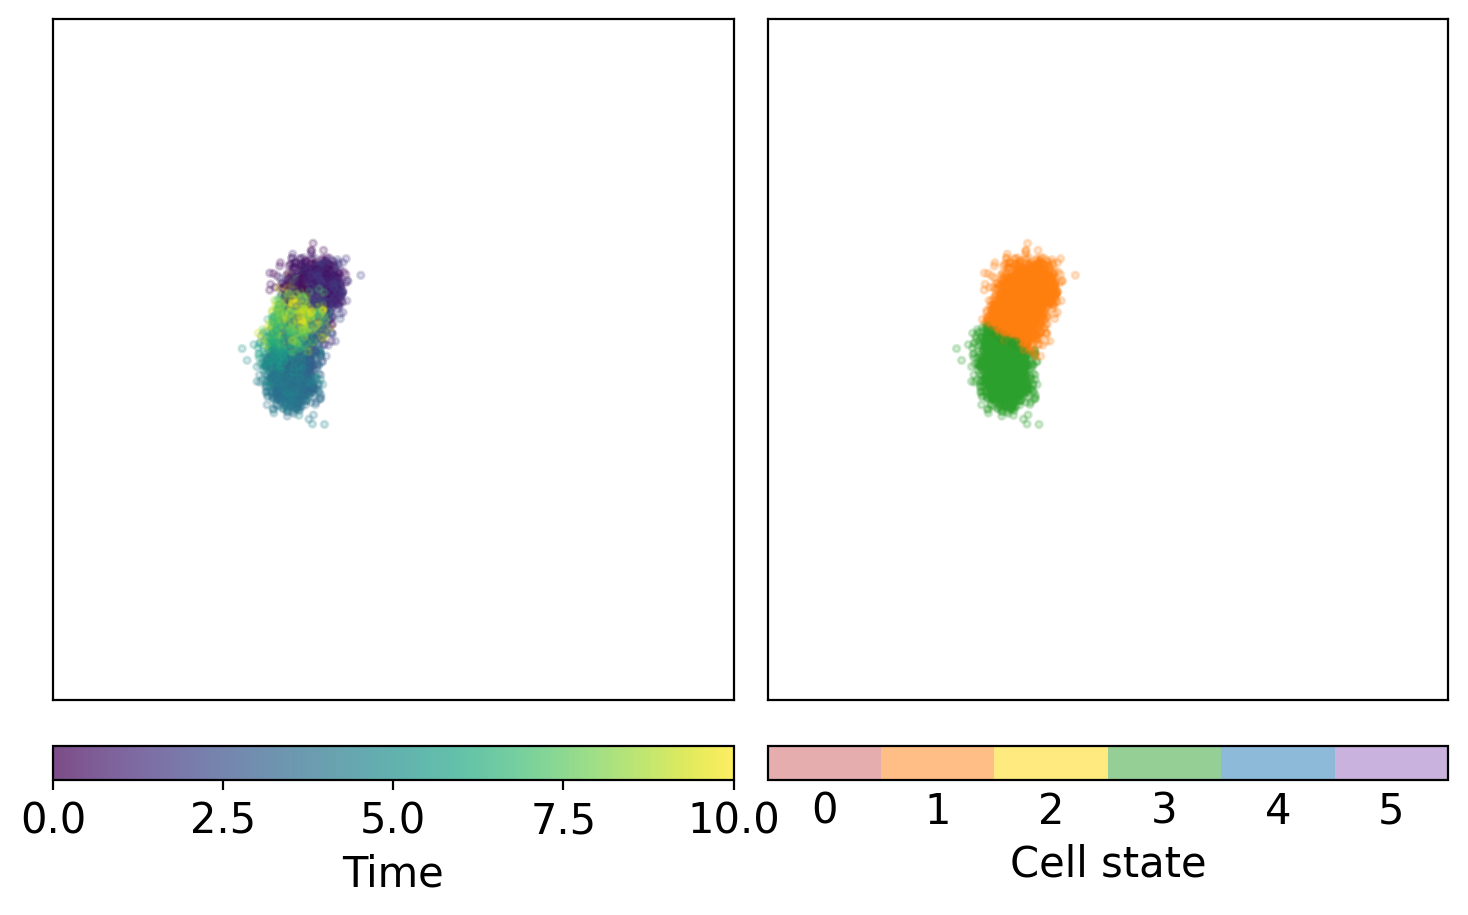

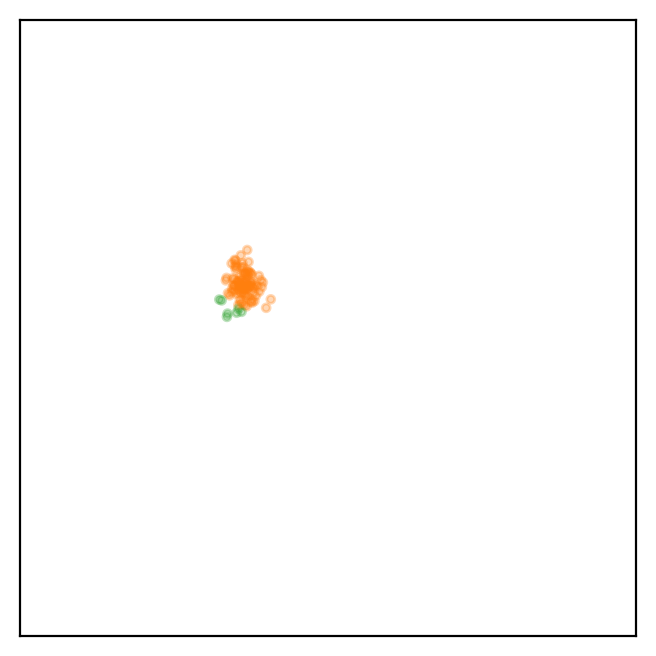

In [30]:
#  Add cells with a scattered initial condition and plot trajectories
n = 100
landscape.init_cells(n, (0., 0.), noise=2.)
get_and_plot_traj(landscape, 0., 10., 51, L, noise=0.2, frozen=False, ndt=50, t_ticks=(0, 10, 5), t_names=None)

# plot final states
plot_cells(landscape, L)

# Cells starting around module i
i = 1
landscape.init_cells(n, i, noise=0.2)
get_and_plot_traj(landscape, 0., 10., 51, L, noise=0.2, frozen=False, ndt=50, t_ticks=(0, 10, 5), t_names=None)

plot_cells(landscape, L)


Landscape with modules:
UnstableNode: x=1.186276491695759; y=2.9896915907454495; a=[1.50989789,0.96795549,1.81863232]; s=[1.28637390,1.00248246,0.94217186],
Center: x=-0.00498863895330981; y=0.22338442906637734; a=[1.47088581,1.50128065,1.02023169]; s=[0.85343232,0.97108277,1.32667868],
Node: x=-1.3239041966479292; y=1.412929537070963; a=[1.07784669,0.67018122,1.62437543]; s=[1.39980292,1.33085470,0.93793198],
UnstableNode: x=2.1751758393134395; y=-0.28107623031507734; a=[0.84366535,0.95738991,0.82388067]; s=[1.00907821,1.33240057,1.49697107],
Node: x=1.7114328307760793; y=-2.5964647637805873; a=[0.58097558,1.06548738,1.88051243]; s=[0.76547761,0.94753694,0.86713649],
Center: x=0.5245303805085753; y=-0.16496972586647551; a=[1.68384237,2.05900299,1.80600101]; s=[1.10084886,0.53008262,1.35903917],
Center: x=1.1011409724228258; y=-1.4998977945623249; a=[0.67225574,2.66383164,1.02230292]; s=[0.91526624,0.54188796,1.40027486]


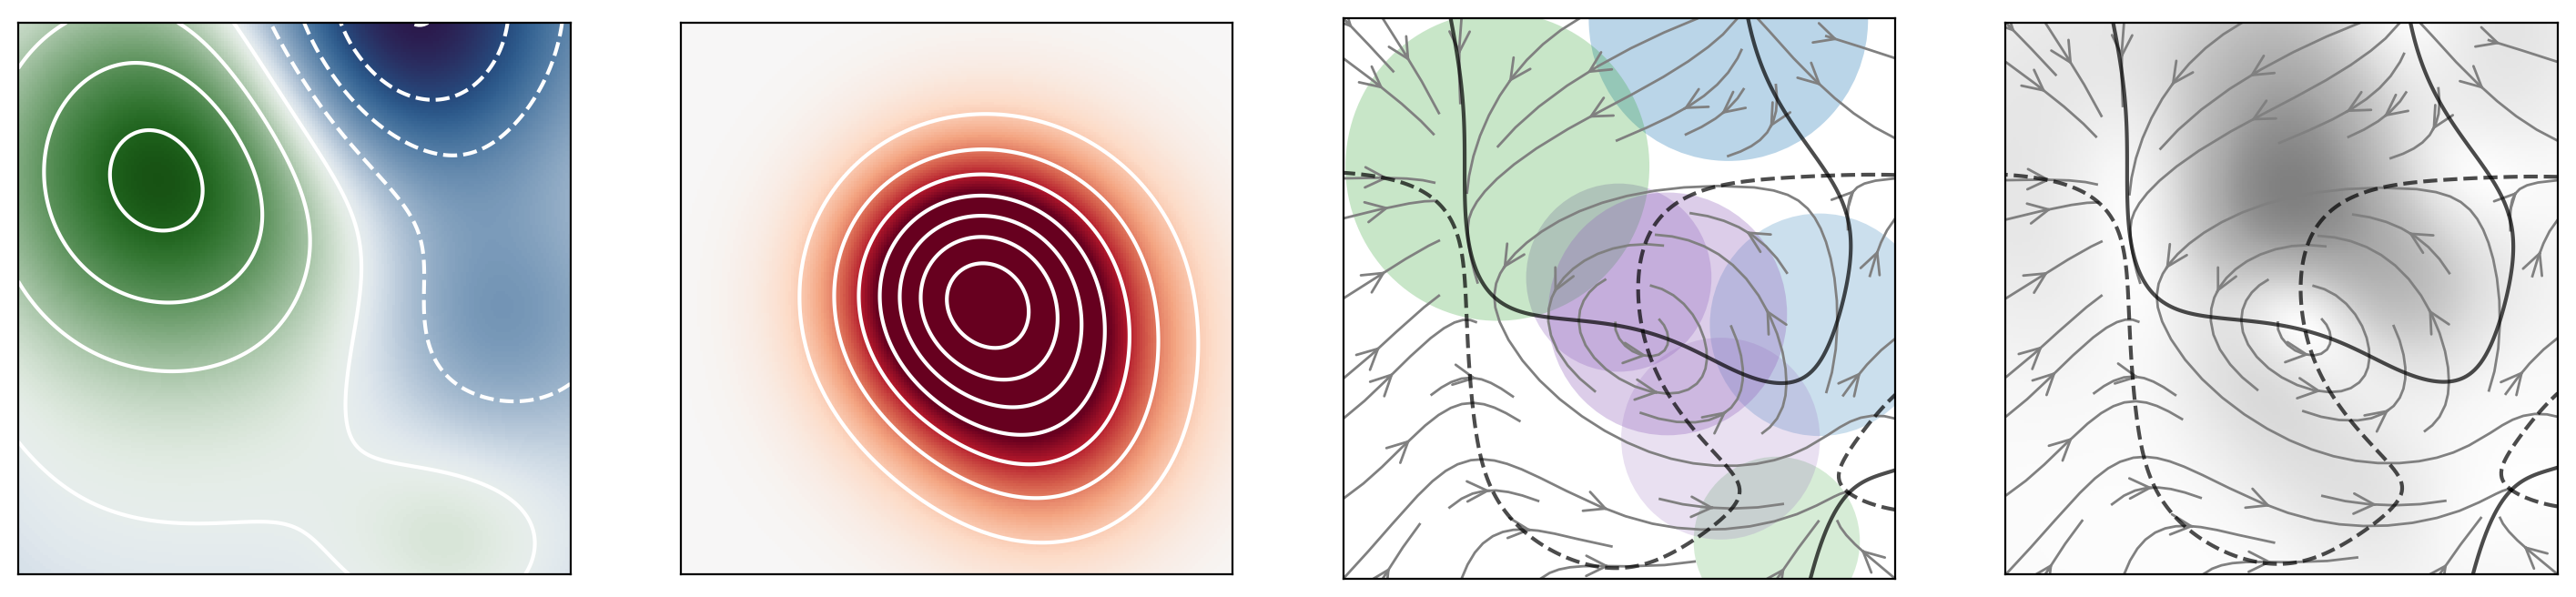

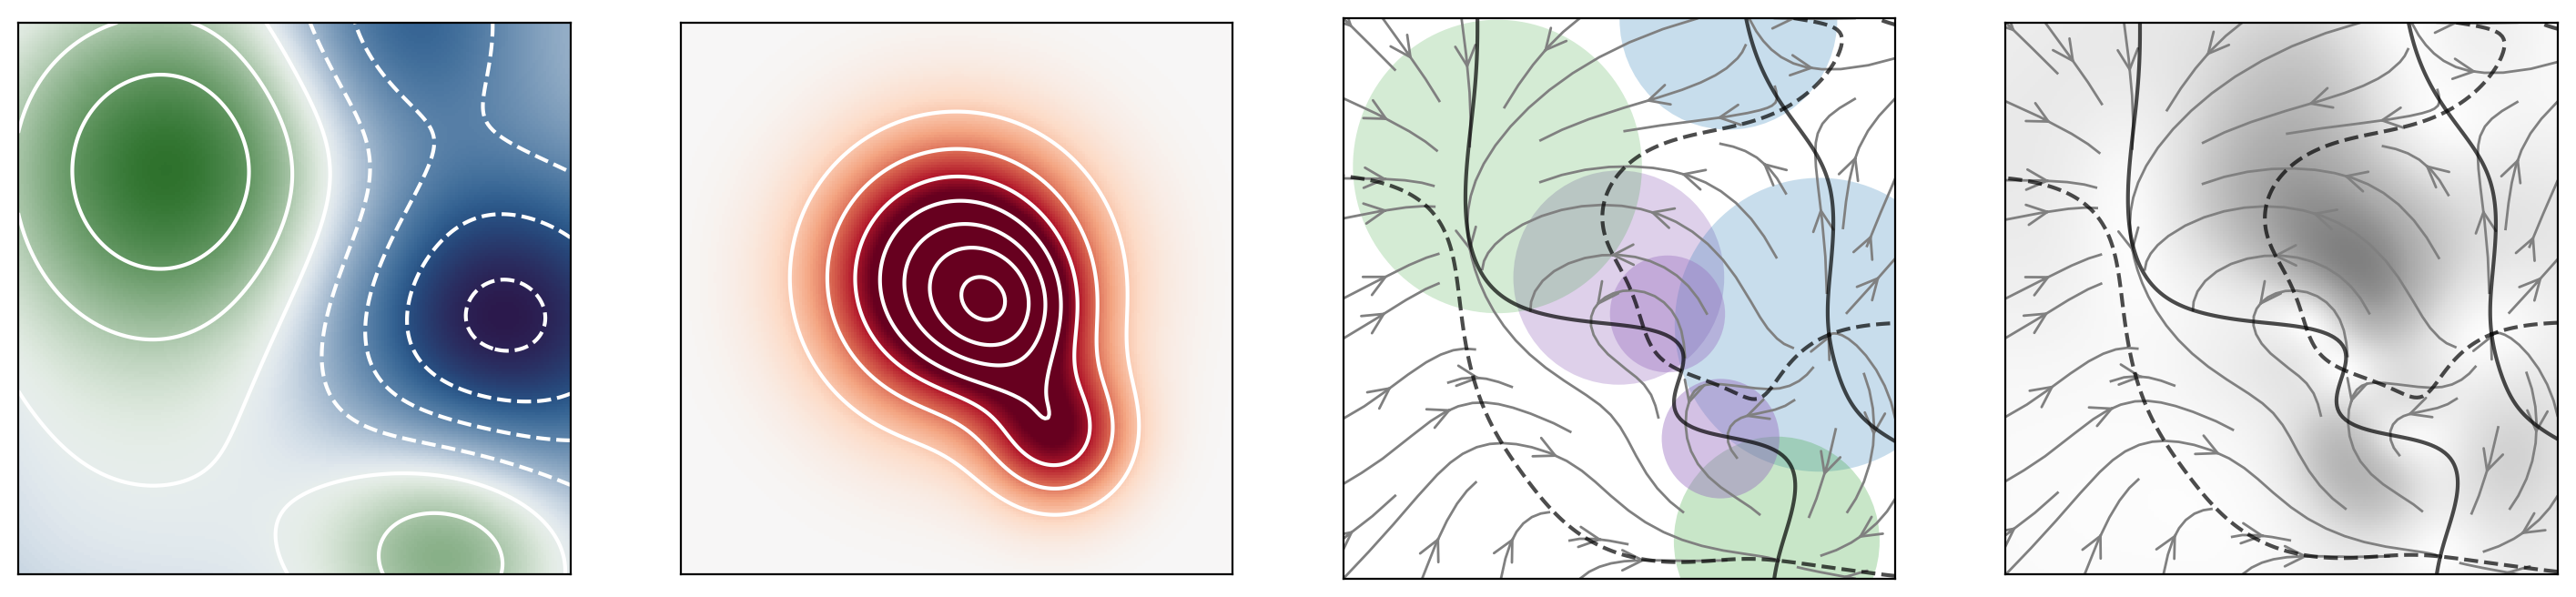

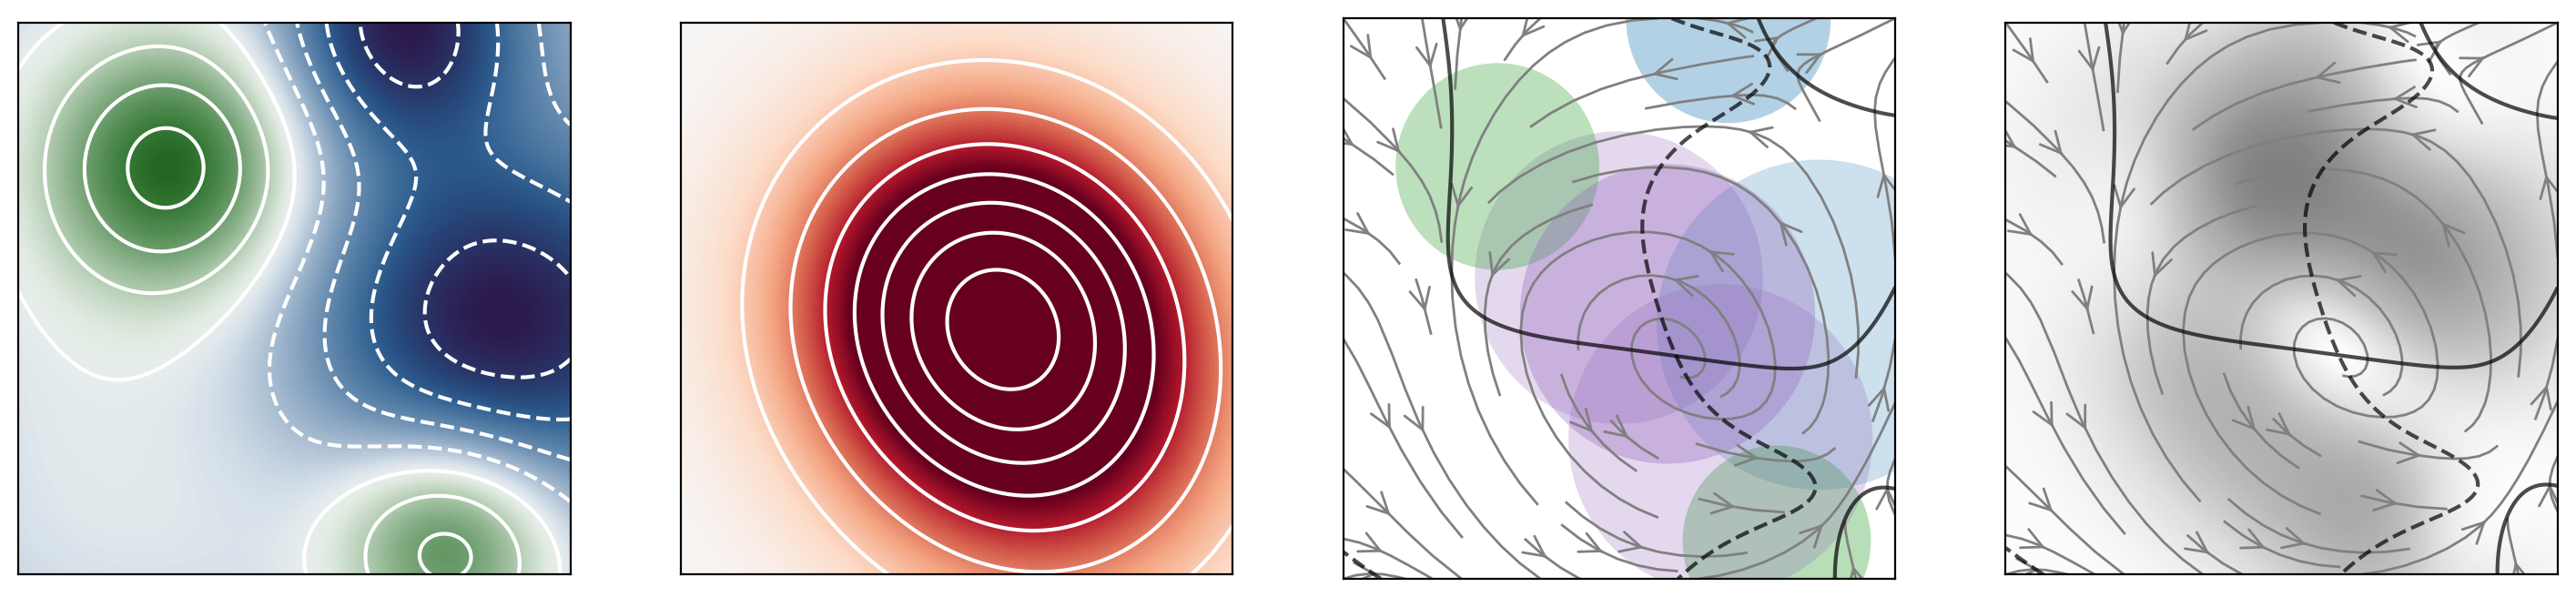

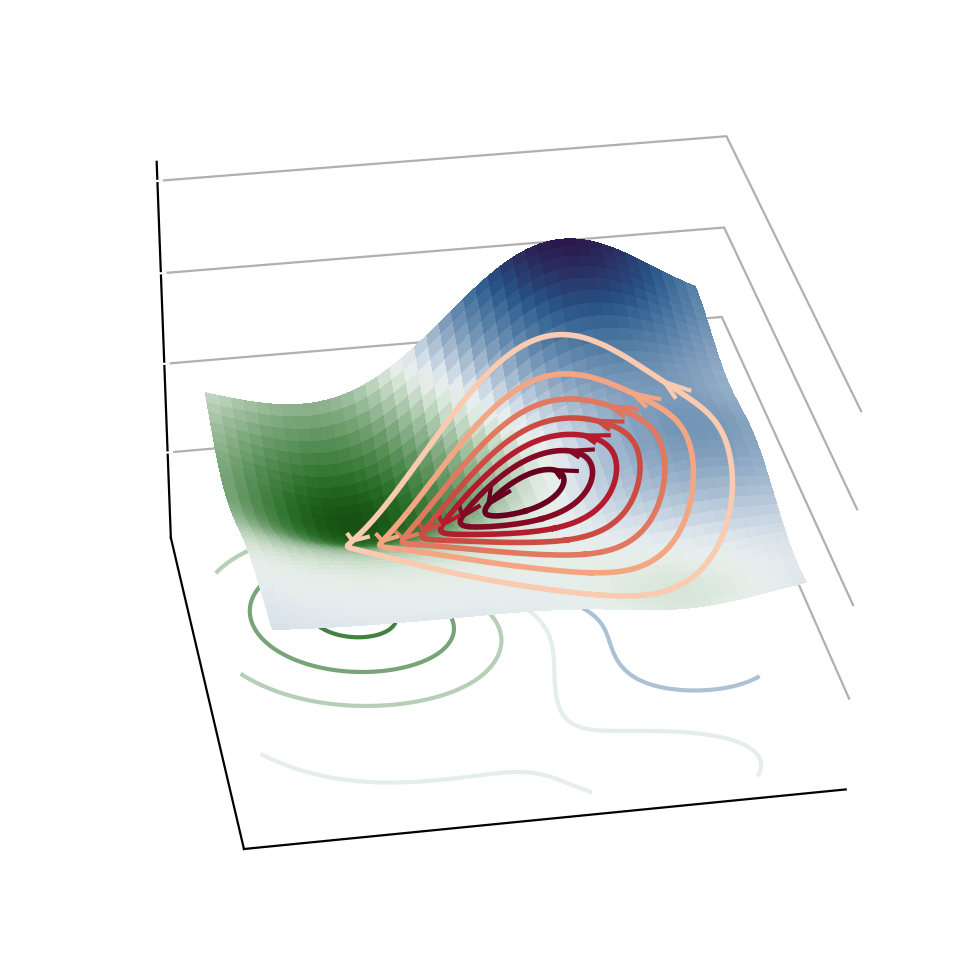

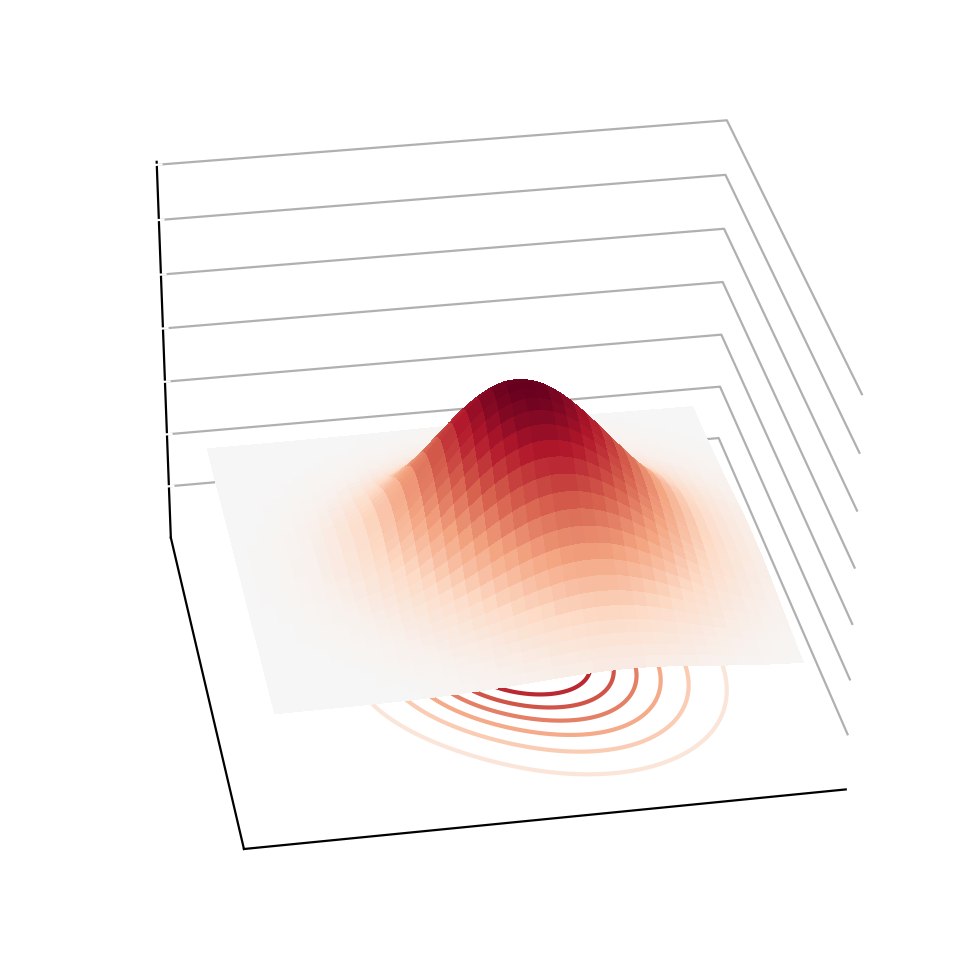

In [24]:
# Random generation of a landscape with gradient and curl modules (piecewise 3 regimes)
%autoreload

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5, 3.),
    's': (0.5, 1.5),
}

par_choice_values = {}

used_fp_types = (Node, UnstableNode, Center, NegCenter)
n_modules = 7
start_module_list = [random.choice(used_fp_types).generate(par_limits,par_choice_values,
                                                           immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.005)
print(landscape)

L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
times = np.asarray((0., 3., 5.))   # timepoints at which to plot 

figures = visualize_all(landscape, xx,yy,times, color_scheme='fp_types', plot_traj=False)

fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=False, rot_contour=True)
fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=False, rot=True)
# fig = visualize_potential(landscape, xx, yy, 2, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=True)

Empty landscape


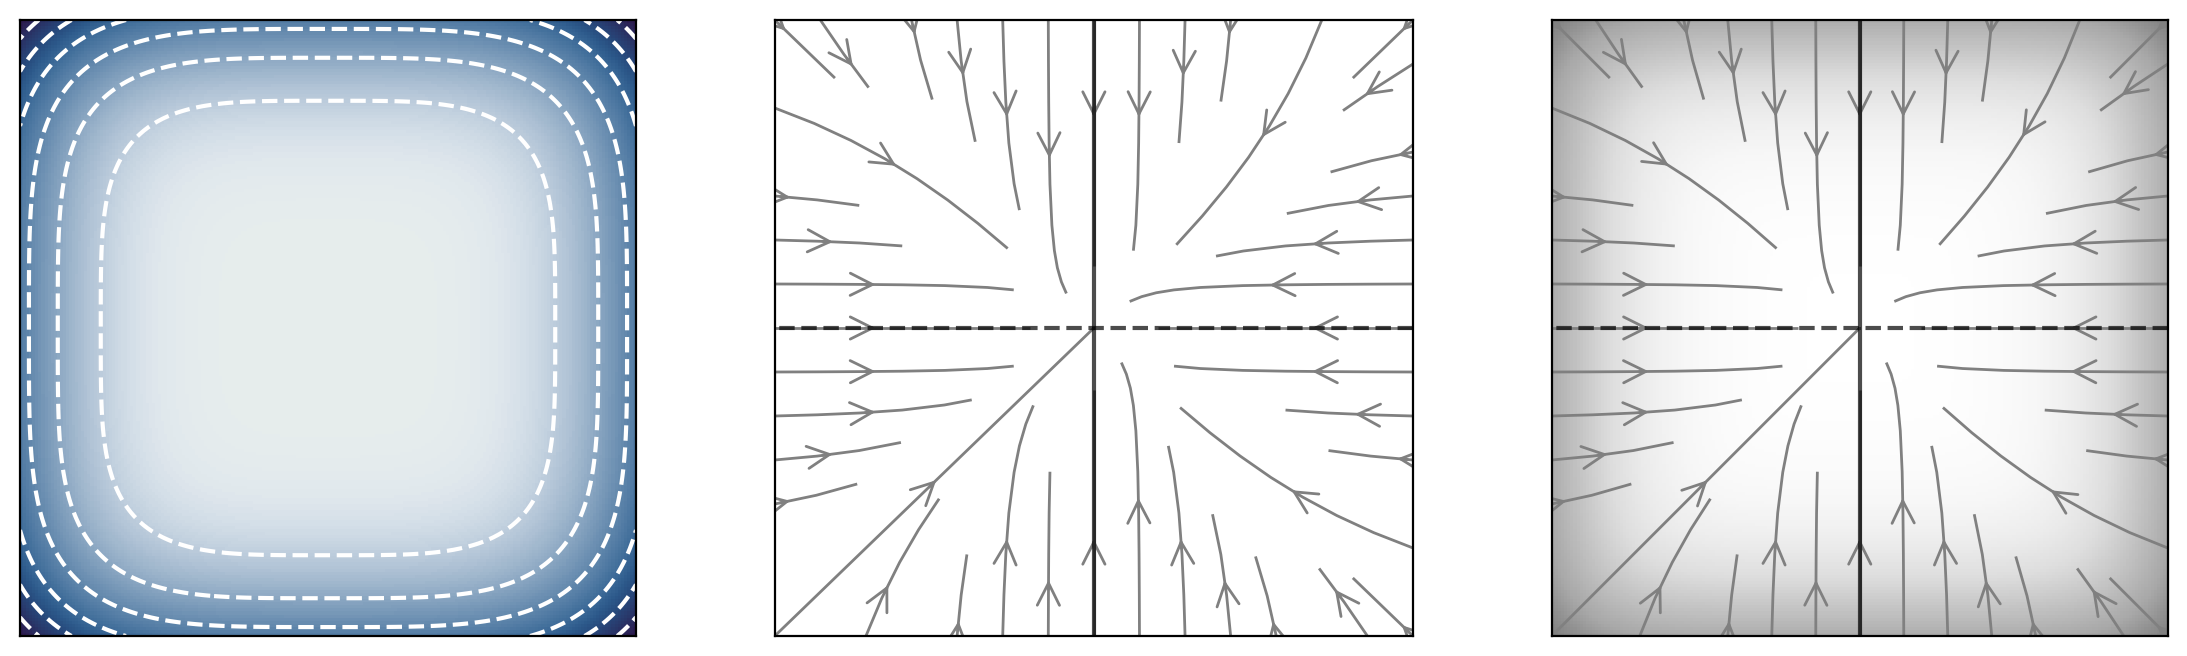

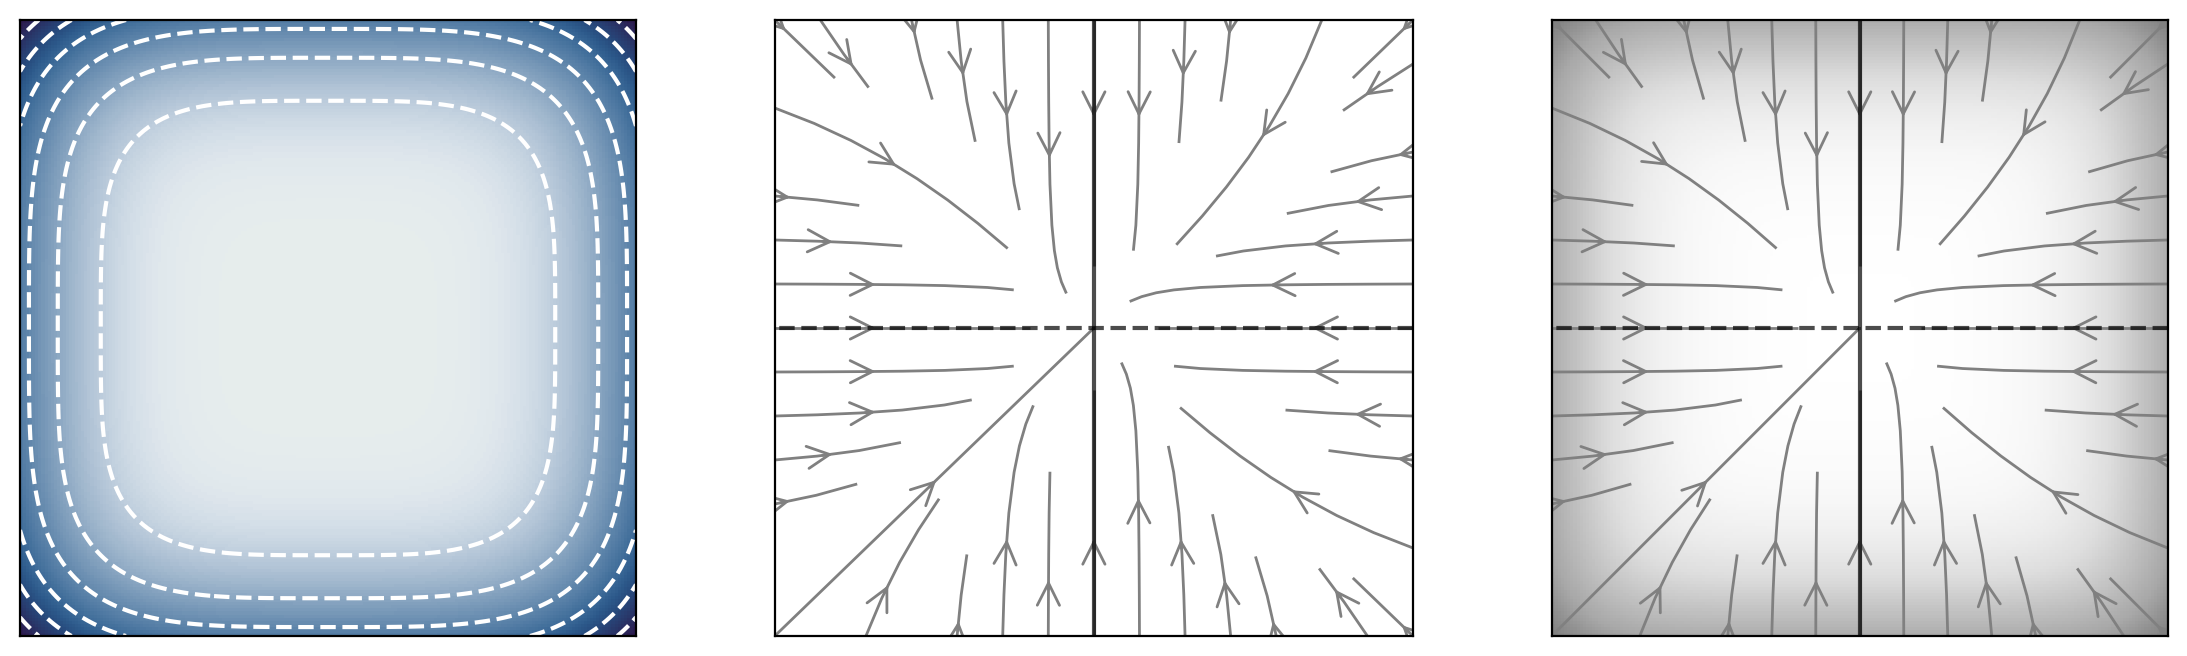

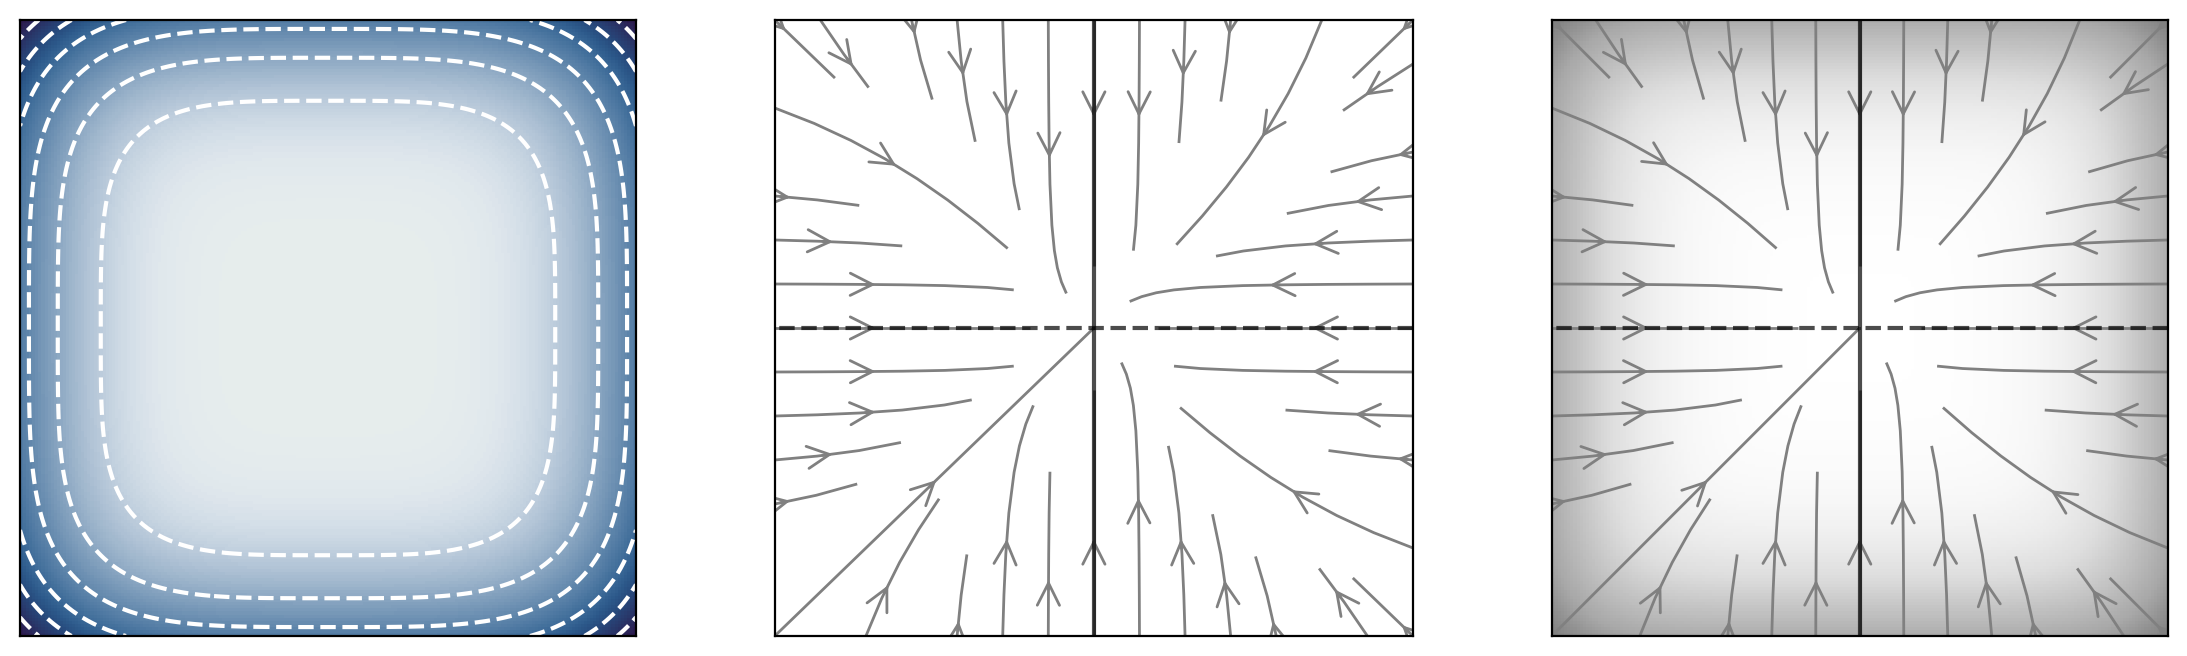

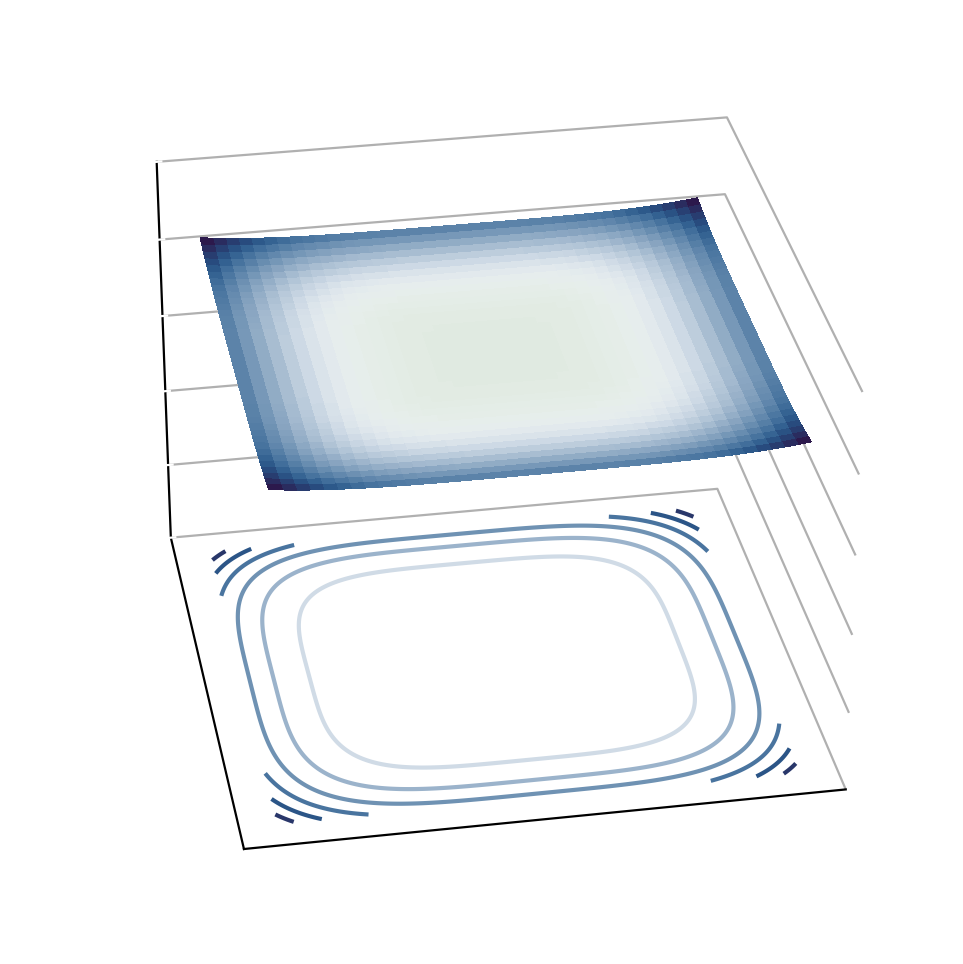

In [25]:
landscape = Landscape([], regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.005)
print(landscape)

L = 3.
npoints = 401
q = np.linspace(-L, L, npoints)
times = np.asarray((0., 3., 5.))   # timepoints at which to plot 

figures = visualize_all(landscape, xx,yy,times, color_scheme='fp_types', plot_traj=False)
fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='fp_types', cmap_center=0.01, scatter=False, rot_contour=True, zlim=(-4,1.))